In [113]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
plt.rcParams['figure.figsize'] = (20, 10)

In [114]:
import numpy as np
import cv2
import os

In [115]:
import bbox_visualizer as bbv
from PIL import ImageColor
from PIL import Image
import sagemaker
import boto3
import json
import cv2
import os

In [116]:
colors = list(ImageColor.colormap.values())



In [117]:
i = 1
img = cv2.imread(f'./data/test/{i}.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

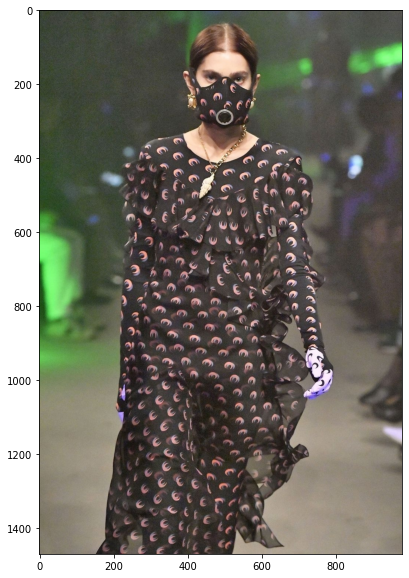

In [118]:
plt.imshow(img)
plt.show()

### Query endpoint that you have created

In [119]:
def query_endpoint(input_img):
    endpoint_name = 'jumpstart-ftc-mask-detection'
    client = boto3.client('runtime.sagemaker')
    response = client.invoke_endpoint(EndpointName=endpoint_name, ContentType='application/x-image', Body=input_img)
    model_predictions = json.loads(response['Body'].read())
    return model_predictions



In [120]:
with open(f'./data/test/{i}.png', 'rb') as file: 
    input_img = file.read()
    
    
best_results_per_input = query_endpoint(input_img)  

### Display model predictions as bounding boxes on the input image 

In [121]:
def yolobbox2bbox(x,y,w,h):
    x1, y1 = x-w/2, y-h/2
    x2, y2 = x+w/2, y+h/2
    return x1, y1, x2, y2

In [122]:
def show_image_with_bboxes(file_name, bboxes, confidences):
    labels = ['MASK'] * len(bboxes)
    img = cv2.imread(f'./data/images/{file_name}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = bbv.draw_multiple_rectangles(img, bboxes)
    plt.imshow(img)
    plt.show()

In [145]:
#image_np = np.array(Image.open(f'./data/test/{i}.png'))

#ax = plt.axes()
#ax.imshow(image_np)
bboxes, classes, confidences = best_results_per_input
#show_image_with_bboxes(1, bboxes, confidences)
m = bboxes[3]

In [146]:
x, y, w, h = m

In [147]:
x, y, w, h

(0.42181098461151123,
 0.10406279284142764,
 0.6003996133804321,
 0.2184036433929881)

In [148]:
from PIL import Image

In [149]:
im = Image.open(f'./data/images/{i}.png')
dw, dh = im.size

In [150]:
dw, dh

(980, 1469)

In [151]:
l = int((x - w / 2) * dw)
r = int((x + w / 2) * dw)
t = int((y - h / 2) * dh)
b = int((y + h / 2) * dh)

if l < 0:
    l = 0
if r > dw - 1:
    r = dw - 1
if t < 0:
    t = 0
if b > dh - 1:
    b = dh - 1

#print(l, r, t, b)

"""
mk,x0,y0,w0,h0 = dimensions
x0 = float(x0)
y0 = float(y0)
w0 = float(w0)
h0 = float(h0)
x=int((x0-w0/2)*width)
y=int((y0-h0/2)*height)
w=int(w0*width)
h=h0*height
"""
x1, x2, y1, y2 = l, r, t, b

In [152]:
bboxes = [[x1, y1, x2, y2]]

In [153]:
bboxes

[[119, 0, 707, 313]]

In [154]:
img = cv2.imread(f'./data/images/{i}.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

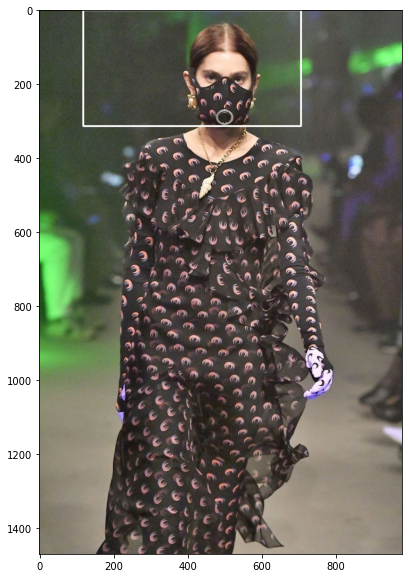

In [155]:
img = bbv.draw_multiple_rectangles(img, bboxes)
    
    
plt.imshow(img)
plt.show()